# Linear regression one variable

Covariance defines whether how two variables change together:

- higher values from a dataset associated with higher values from other dataset (positive covariance)
- higher values from a dataset associated with lower values from other dataset (negative covariance)
- no correlation

independence of two variable is given by $cov(x,y) = 0$

Correlation is given by:

$r_{xy} = \frac{cov(x, y)}{\sigma_{x} \sigma_{y}}$

Regression and correlation measures two samples and verify how they relate to each other.

Linear regression is given by:

$y = a + bx$

- a is the point where the line reaches axis $y$ when $x=0$ 
- b is slope

Example from [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)
<div style='float: center'>
  <img style='width: 600px' src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png"/>
</div>

$Y_{i} = \alpha + \beta \cdot X_{i}$ 
Onde:

- $Y_{i}$ dependent variable
- $\alpha$ linear coefficient
- $\beta$ angular coefficient
- $X_{i}$ independent variable
- $\epsilon_{i}$ random error




Example problem:

| Sales quantity | Revenue |
|----------------|---------|
| 10 | 100 |
| 20 | 100 |
| 30 | 200 |
| 40 | 200 |
| 50 | 400 |

In [73]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [130]:
y = np.array([100, 100, 200, 200, 400])
x = np.array([10, 20, 30, 40, 50])

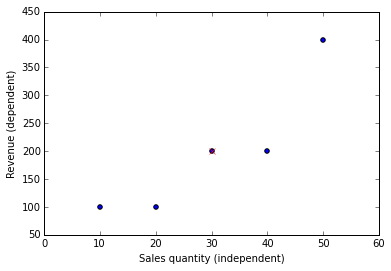

In [138]:
plt.scatter(x, y)
# plt.plot(x.mean(), y.min(), 'xr')
plt.plot(x.mean(), y.mean(), 'xr')
plt.ylabel('Revenue (dependent)')
plt.xlabel('Sales quantity (independent)')
plt.show()

In [76]:
sxx = np.sum((x - x.mean())**2)              # sum of x's
syy = np.sum((y - y.mean())**2)              # sum of y's
sxy = np.sum((x - x.mean()) * (y -y.mean())) # sum of xy's

B = sxy / sxx 
A = y.mean() - B * x.mean()

print 'y = {} + {}x'.format(A, B)

y = -10.0 + 7.0x


R2 score is a metric that determines how well the model fits the observations.

It ranges from 0 to 1. Being 1 a perfect fit.

In [77]:
print 'R2 score: {}'.format(B*sxy/syy)

R2 score: 0.816666666667


1. For each increment in $(x=1)$ revenue $y$ increases in $7$ 
2. Revenue $y$ is $-10$ for an empty production (operational cost).

## Sklearn

Scikit-learn has all methods

In [140]:
print x.shape, x.reshape(5, 1).shape
print x, x.reshape(5, 1)

(5,) (5, 1)
[10 20 30 40 50] [[10]
 [20]
 [30]
 [40]
 [50]]


In [145]:
from sklearn import linear_model

# create and fit a regression model (sklearn needs arrays to be reshaped)
regr = linear_model.LinearRegression()
regr.fit(x.reshape(5,1), y.reshape(5,1))

print 'B: {}'.format(regr.coef_)
test = np.array([0, 1, 2, 55])
print 'A: {}'.format(regr.predict(test.reshape(4, 1)))

B: [[ 7.]]
A: [[ -10.]
 [  -3.]
 [   4.]
 [ 375.]]


In [79]:
from sklearn.metrics import r2_score
print r2_score(y, regr.predict(x.reshape(5, 1)))

0.816666666667


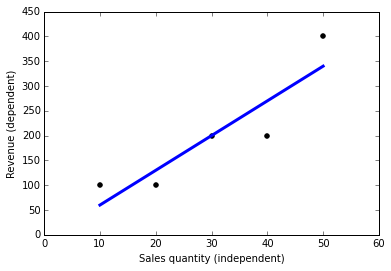

In [146]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x.reshape(5, 1)), color='blue', linewidth=3)
plt.ylabel('Revenue (dependent)')
plt.xlabel('Sales quantity (independent)')
plt.show()

In [147]:
!wget "http://scg.sdsu.edu/wp-content/uploads/2013/09/brain_body.txt"

--2015-12-08 16:10:59--  http://scg.sdsu.edu/wp-content/uploads/2013/09/brain_body.txt
Resolving scg.sdsu.edu... 130.191.140.45
Connecting to scg.sdsu.edu|130.191.140.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1781 (1.7K) [text/plain]
Saving to: 'brain_body.txt.1'

brain_body.txt.1    100%[=====================>]   1.74K  --.-KB/s   in 0s     

2015-12-08 16:11:00 (113 MB/s) - 'brain_body.txt.1' saved [1781/1781]



In [149]:
raw = []
with open('brain_body.txt', 'r') as handle:
    raw = [line.strip() for line in handle]

target = []
data = []

for n, raw_data in enumerate(raw[13:70]):
    _, yy, xx = raw_data.split()
    print '{}: {} {}'.format(n, yy, xx)
    target.append(eval(yy))
    data.append(eval(xx))

0: 3.385 44.500
1: 0.480 15.500
2: 1.350 8.100
3: 465.000 423.000
4: 36.330 119.500
5: 27.660 115.000
6: 14.830 98.200
7: 1.040 5.500
8: 4.190 58.000
9: 0.425 6.400
10: 0.101 4.000
11: 0.920 5.700
12: 1.000 6.600
13: 0.005 0.140
14: 0.060 1.000
15: 3.500 10.800
16: 2.000 12.300
17: 1.700 6.300
18: 2547.000 4603.000
19: 0.023 0.300
20: 187.100 419.000
21: 521.000 655.000
22: 0.785 3.500
23: 10.000 115.000
24: 3.300 25.600
25: 0.200 5.000
26: 1.410 17.500
27: 529.000 680.000
28: 207.000 406.000
29: 85.000 325.000
30: 0.750 12.300
31: 62.000 1320.000
32: 6654.000 5712.000
33: 3.500 3.900
34: 6.800 179.000
35: 35.000 56.000
36: 4.050 17.000
37: 0.120 1.000
38: 0.023 0.400
39: 0.010 0.250
40: 1.400 12.500
41: 250.000 490.000
42: 2.500 12.100
43: 55.500 175.000
44: 100.000 157.000
45: 52.160 440.000
46: 10.550 179.500
47: 0.550 2.400
48: 60.000 81.000
49: 3.600 21.000
50: 4.288 39.200
51: 0.280 1.900
52: 0.075 1.200
53: 0.122 3.000
54: 0.048 0.330
55: 192.000 180.000
56: 3.000 25.000


In [150]:
target = np.array(target)
data = np.array(data)

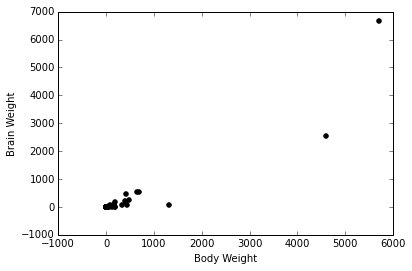

In [151]:
# Plot outputs
plt.scatter(data, target,  color='black')
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()

In [155]:
# create and fit a regression model (sklearn needs arrays to be reshaped)
regr = linear_model.LinearRegression()
regr.fit(data.reshape(57, 1), target.reshape(57, 1))

print 'B: {}'.format(regr.coef_)
print 'A: {}'.format(regr.predict(np.array([0])))
print r2_score(target, regr.predict(data.reshape(57, 1)))

B: [[ 0.90405419]]
A: [[-61.38017891]]
0.87250574669


In [159]:
# create and fit a regression model (sklearn needs arrays to be reshaped)
regr = linear_model.LinearRegression()
regr.fit(np.log(data).reshape(57, 1), np.log(target).reshape(57, 1))

print 'B: {}'.format(regr.coef_)
print 'A: {}'.format(regr.predict(np.array([0])))
print r2_score(np.log(target), regr.predict(np.log(data).reshape(57, 1)))

B: [[ 1.22170479]]
A: [[-2.51307158]]
0.924948889753


$y = -2.5 + 1.22X$

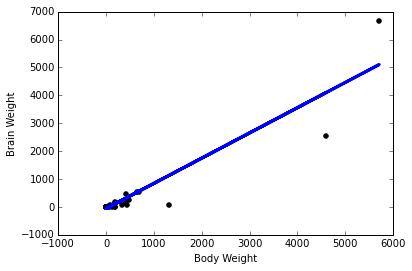

In [157]:
# Plot outputs
plt.scatter(data, target,  color='black')
plt.plot(data, regr.predict(data.reshape(57, 1)), color='blue', linewidth=3)
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()

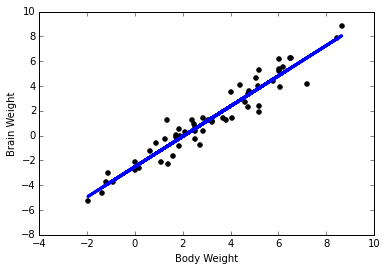

In [160]:
# Plot outputs
plt.scatter(np.log(data), np.log(target),  color='black')
plt.plot(np.log(data), regr.predict(np.log(data).reshape(57, 1)), color='blue', linewidth=3)
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()

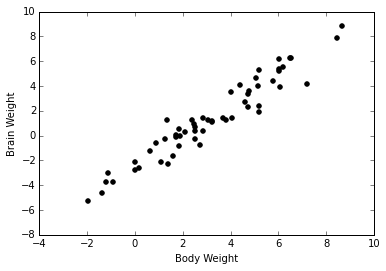

In [158]:
# Plot outputs
plt.scatter(np.log(data), np.log(target),  color='black')
plt.ylabel('Brain Weight')
plt.xlabel('Body Weight')
plt.show()